<a href="https://colab.research.google.com/github/Schauhan21/DIP/blob/main/DIP_PA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io                            # utilities to read and write images in various formats
import numpy as np  # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,15)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Digital Image Processing - Programming Assignment 

The following progamming assignment involves image filtering in the frequency domain. The deadline for returning your work is **14 April 2022 at 23:59. 
Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding to the programming assignments, please do not hesitate to contact the course assistant by e-mail at the address dip@unioulu.oulu.fi.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):Subam Chauhan(Y69317276)** 
* **Contact information:schauhan21@student.oulu.fi** 

# 4. Image transforms : lowpass and highpass filtering in frequency domain

In the following, you will first perform ideal lowpass and highpass filtering on the test image, and later, we will also consider the Gaussian lowpass and highpass filtering. First, read the part concerning image enhancement in frequency domain in the lecture notes or in the course book. Specifically, you should look at the **Chapter-4** (available as a PDF file) in the lecture notes in Moodle.

Now, perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.


**4.1. Read and display the test image `hplptest.jpg`.**

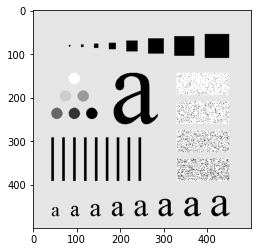

In [ ]:
# read test image
img = io.imread("hplptest.jpg")

# display the test image
imgplot = plt.imshow(img)
plt.show()

**4.2. Compute the Fourier transform (FT) of the test image and take a look at what the magnitude of the FT looks like.**

Hint: When plotting the FTs, use logarithmic graylevel transformation to make the result more illustrative for human visual system: 

`>>> np.log(np.abs(image_fft)+1)`

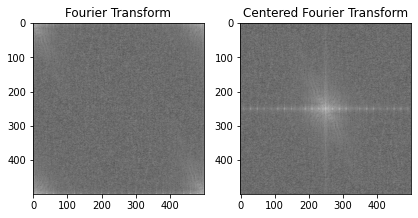

In [ ]:
from scipy import fftpack

# compute the FT of the test image using 'fftpack.fft2'
f_transform = fftpack.fft2(img)
# translate the origin of the FT (low frequencies) to the center using 'ftpack.fftshift'
c_transform = fftpack.fftshift(f_transform)
# display the magnitude of the uncentered and centered FT using 'imshow'.
fig,ax = plt.subplots(1,2)
img_gray1 = np.log(np.abs(f_transform)+1)
ax[0].imshow(img_gray1)
ax[0].set_title('Fourier Transform')

img_gray2 = np.log(np.abs(c_transform)+1)
ax[1].imshow(img_gray2)
ax[1].set_title('Centered Fourier Transform')

fig.tight_layout()

**The code for constructing an ideal lowpass filter is given below:**

In [ ]:
# make two frequency matrices, 'f1' and 'f2', as help variables (frequencies from -1 to 1)
n = (500,500)
f1 = ( np.arange(0,n[0])-np.floor(n[0]/2) ) * (2./(n[0]))
f2 = ( np.arange(0,n[1])-np.floor(n[1]/2) ) * (2./(n[1]))
f1, f2 = np.meshgrid(f1, f2)

# make a matrix with absolute values of frequency (“sampled” frequency domain)
D = np.sqrt(f1**2 + f2**2)

# set cut-off frequency D0 to 0.2
D0 = 0.2;

# filter matrix is initialized to ones 
Hlp = np.ones(n)

# set frequencies in filter mask Hlp greater than the cut-off frequency D0 to zero, other elements remain unaltered
Hlp[D>D0] = 0.0

**4.3. Modify the lowpass filter code and construct ideal highpass filter `Hhp` with the same cut-off frequency `D0=0.2` and display both ideal lowpass and highpass filter masks in the same figure.**

Text(0.5, 1.0, 'High Pass Filter')

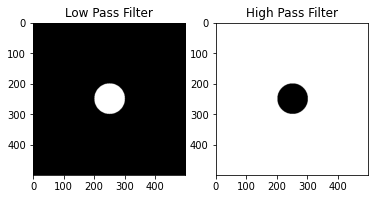

In [ ]:
# create ideal highpass filter mask Hhp
Hhp = np.ones(n)
Hhp[D<D0] = 0.0
# display the filters
fig, ax = plt.subplots(1,2)
ax[0].imshow(Hlp)
ax[0].set_title('Low Pass Filter')

ax[1].imshow(Hhp)
ax[1].set_title('High Pass Filter')

**4.4. Perform ideal lowpass and highpass filtering in the frequency domain by multiplying the centralized FT of the original image with the `Hlp` and `Hhp` filter masks (element-per-element matrix multiplication) and display the two resulting FTs in the same figure.**

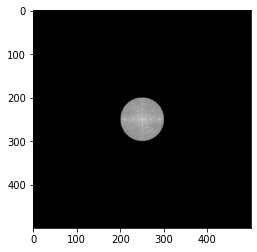

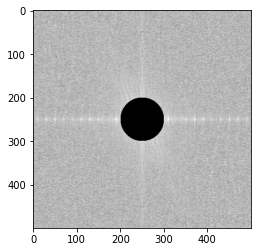

In [ ]:
# apply ideal lowpass and highpass filtering to the test image, i.e. multiply element-wise the fft of the image with the filter masks
low_masked = np.multiply(Hlp, c_transform)
high_masked = np.multiply(Hhp, c_transform)
# display the magnitude of the resulting FTs

filtered_image = plt.imshow(np.log(np.abs(low_masked)+1))
plt.show()

filtered_image = plt.imshow(np.log(np.abs(high_masked)+1))
plt.show(filtered_image)

**4.5. Reconstruct the filtered images with `fftpack.ifft2()` and `fftpack.ifftshift()` in reverse order and display the two filtered images using `imshow()` in the same figure.** 

Hint: Due to round-off errors, you have to take the real part of the result of inverse FT before displaying it with `imshow()`. Please note also that the resulting images values beyond the original `uint8` image `[0,255]`, so you need to clip these values using `np.clip()`.

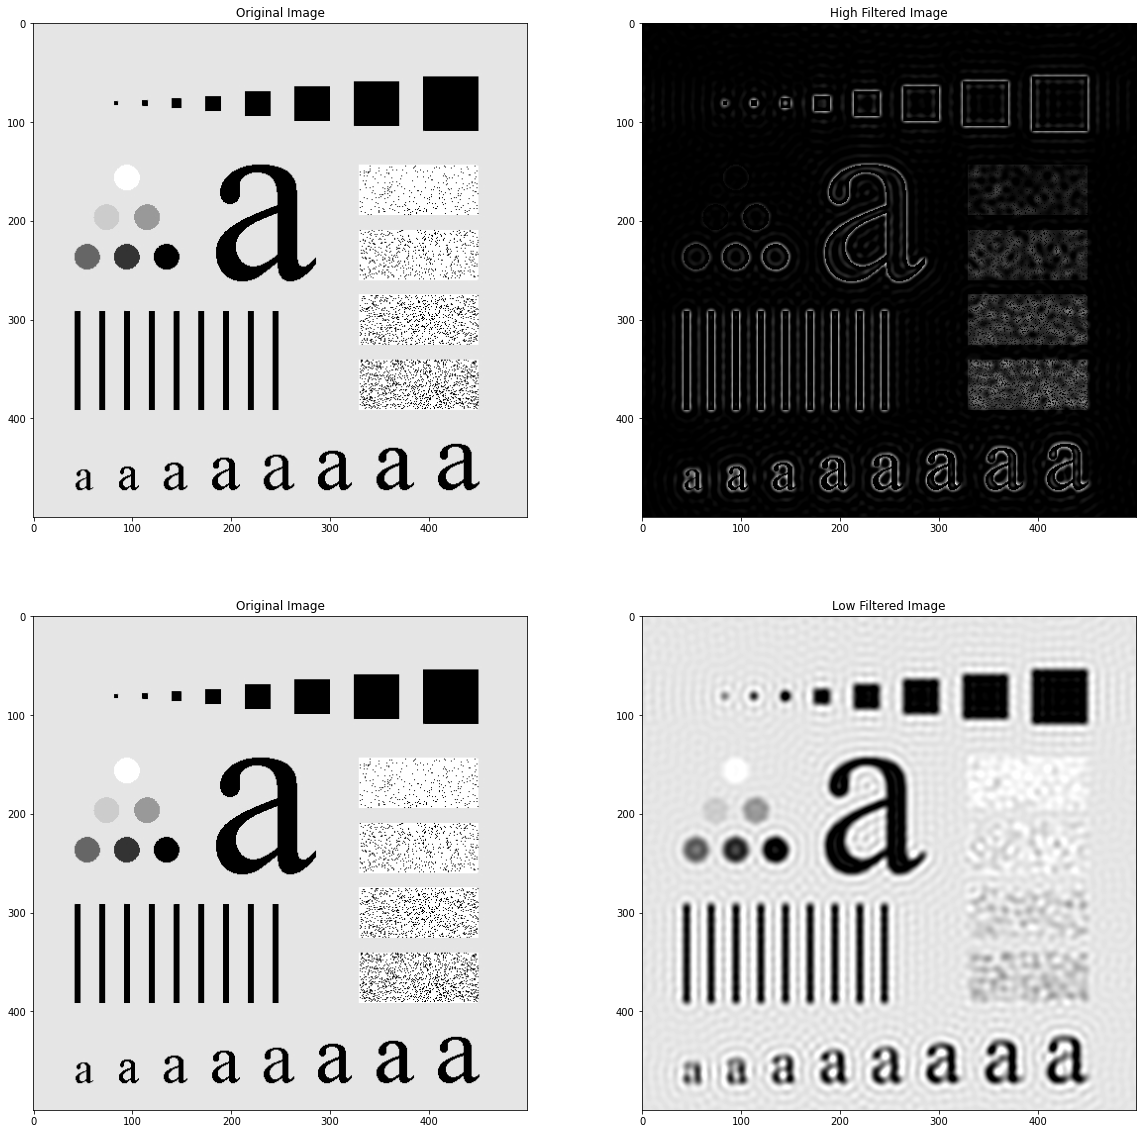

In [ ]:
# reconstruct the filtered images
new_low_hlp = fftpack.ifft2(fftpack.ifftshift(low_masked))
new_high_hlp = fftpack.ifft2(fftpack.ifftshift(high_masked))
# take the 'real' part of the resulting images due to possible round-off errors
new_low_hlp = np.real(new_low_hlp)
new_high_hlp = np.real(new_high_hlp)
# clip values beyond the uint8 range [0,255] 
new_low_hlp = np.clip(new_low_hlp, 0, 255)
new_high_hlp = np.clip(new_high_hlp, 0, 255)
# display the original image and its lowpass and highpass filtered images in the same figure
f = plt.figure(figsize = (20,20))
axarr = f.subplots(2,2)
axarr[0,0].imshow(img)
axarr[0,0].set_title('Original Image')
axarr[0,1].imshow(new_high_hlp)
axarr[0,1].set_title('High Filtered Image')
axarr[1,0].imshow(img)
axarr[1,0].set_title('Original Image')
axarr[1,1].imshow(new_low_hlp)
axarr[1,1].set_title('Low Filtered Image')
fig.tight_layout()

When performing ideal lowpass and highpass filtering, unwanted artefacts appear to the filtered image. **What is this phenomenon called and why does it occur?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**4.6. Now, construct Gaussian lowpass and highpass filters with cut-off frequency `D0=0.2` and display them in the same figure.**

Hint: All you need to do is to modify the filter matrix `Hlp` line in the example code snippet accordingly to form `Hlpg` and `Hhpg` (see, formula 4.3-7 in the course book or the lecture notes, specifically, the **chapter04.pdf**).

Text(0.5, 1.0, 'Gaussian Highpass filter')

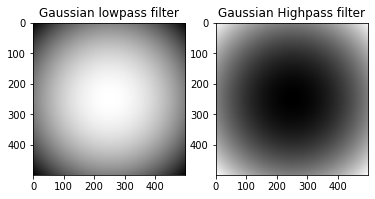

In [ ]:
# construct Gaussian lowpass and highpass filters
gaussian_low = np.exp(-np.square(D)/2*D0**2)
gaussian_high = 1-gaussian_low
# display the filter masks
f, axarr = plt.subplots(1,2)
axarr[0].imshow(gaussian_low)
axarr[0].set_title('Gaussian lowpass filter')
axarr[1].imshow(gaussian_high)
axarr[1].set_title('Gaussian Highpass filter')


**4.7. Perform Gaussian lowpass and highpass filtering to the original test image and display the magnitude of the resulting FTs in the same figure.**

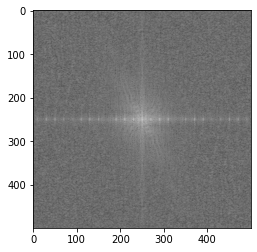

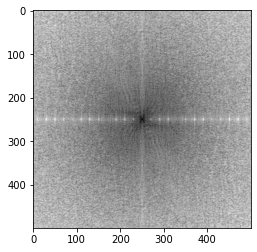

In [ ]:
# apply gaussian lowpass and highpass filtering to the test image
gaussian_low_filter = np.multiply(gaussian_low, c_transform)
gaussian_high_filter = np.multiply(gaussian_high, c_transform)
# display the magnitude of the resulting FTs
filtered_image_1 = plt.imshow(np.log(np.abs(gaussian_low_filter)+1))
plt.show(filtered_image_1)

filtered_image_2 = plt.imshow(np.log(np.abs(gaussian_high_filter)+1))
plt.show(filtered_image_2)

**4.8. Finally, reconstruct the filtered images like in step 4.5. and display the original image and the two Gaussian filtered images in the same figure.**

Text(0.5, 1.0, 'Gaussian Low Filtered Image')

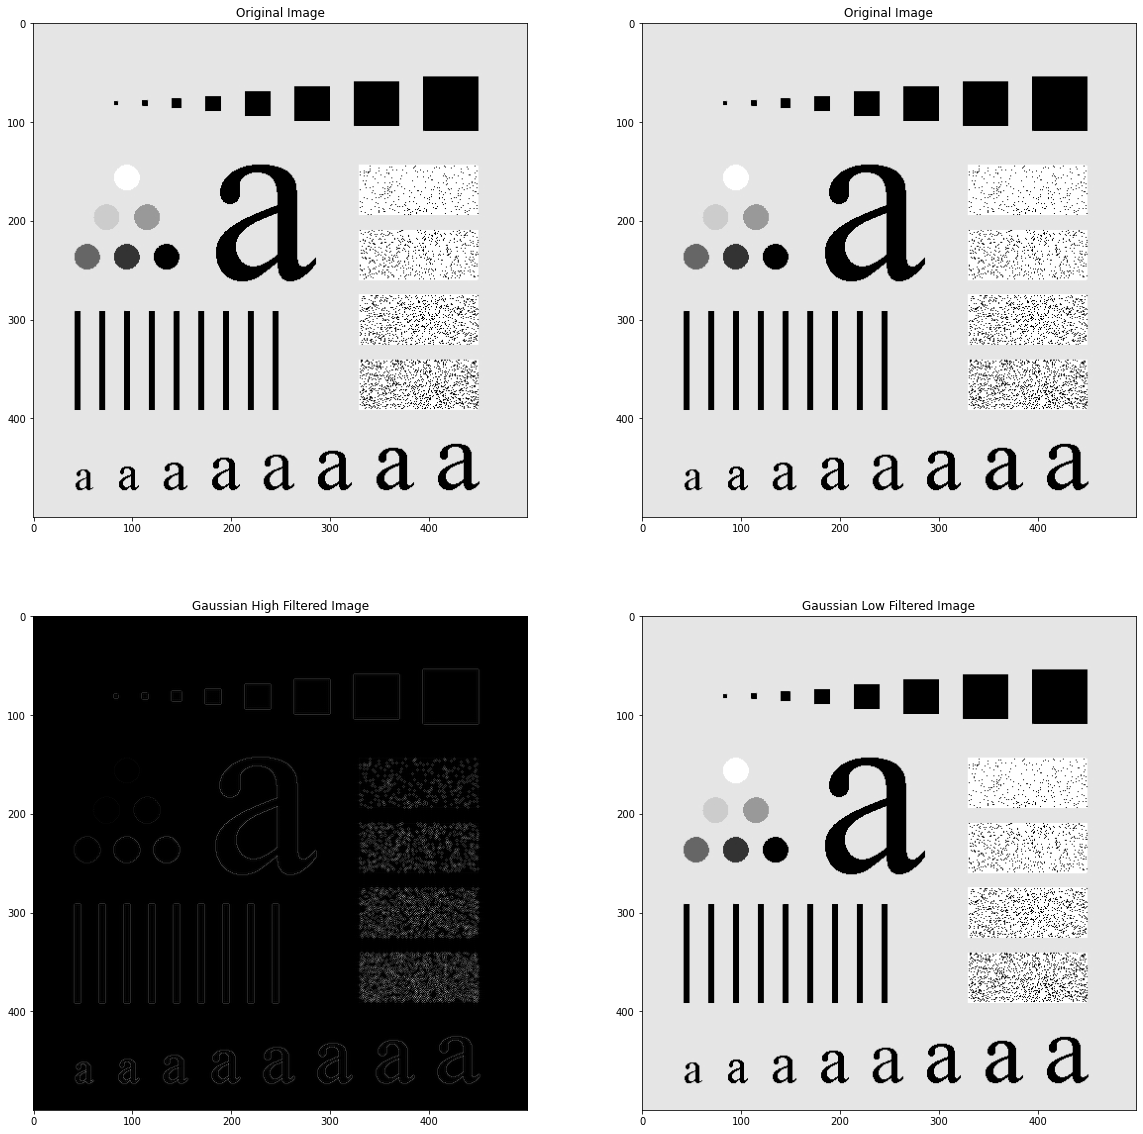

In [ ]:
# reconstruct the filtered images 
new_gau_low_hlp = fftpack.ifft2(fftpack.ifftshift(gaussian_low_filter))
new_gau_high_hlp = fftpack.ifft2(fftpack.ifftshift(gaussian_high_filter))

new_gau_low_hlp = np.real(new_gau_low_hlp)
new_gau_high_hlp = np.real(new_gau_high_hlp)

new_gau_low_hlp = np.clip(new_gau_low_hlp, 0, 255)
new_gau_high_hlp = np.clip(new_gau_high_hlp, 0, 255)

# display the three images in the same figure
f = plt.figure(figsize = (20,20))
axarr = f.subplots(2,2)
axarr[0,0].imshow(img)
axarr[0,0].set_title('Original Image')
axarr[1,0].imshow(new_gau_high_hlp)
axarr[1,0].set_title('Gaussian High Filtered Image')
axarr[0,1].imshow(img)
axarr[0,1].set_title('Original Image')
axarr[1,1].imshow(new_gau_low_hlp)
axarr[1,1].set_title('Gaussian Low Filtered Image')

**Do the unwanted artefacts appear in the Gaussian lowpass filtered image, why or why not?**

`No. There are no unwanted artefacts on gaussian lowpass filtered image because there is no abrupt edge and thus image looks smooth`

**What kind of effect does Gaussian (and ideal) lowpass filtering have on images in general? Why? What about highpass filtering? Why?**

`Where there is extreme change, high pass filter provides edges. Lowpass filtering has no ringing effect where as ideal has ringing effect`

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`7 hours`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Yes, the help was enough but I would like it more detailed if available.`

# References
`https://stackoverflow.com/questions/66935821/how-to-apply-a-lpf-and-hpf-to-a-fft-fourier-transform`
`https://stackoverflow.com/questions/50614085/applying-low-pass-and-laplace-of-gaussian-filter-in-frequency-domain`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA3_[student number(s)].ipynb`** (e.g. `DIP_PA3_1234567.ipynb` if solo work or `DIP_PA3_1234567-7654321.ipynb` if pair work) and upload it as your submission to Moodle.